In [10]:
!pip install dtreeviz

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
from dtreeviz.trees import *

In [12]:
data = pd.read_csv("/content/decision_tree_practice_dataset.csv")
data

,age,income,education_years,hours_per_week,experience_years,credit_score,owns_house,owns_car,num_dependents,city_tier,loan_approved
0,56,21920,5,52,26,568,1,0,3,3,0
1,69,126121,5,72,24,663,0,0,1,3,1
2,46,97219,13,49,31,399,1,1,4,3,0
3,32,96872,10,23,18,514,0,0,5,1,0
4,60,101132,7,68,23,396,1,1,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,24,80726,4,50,31,773,0,0,1,2,0
4996,66,112906,2,53,32,743,1,0,1,3,1
4997,26,36532,2,69,3,711,0,1,5,1,0
4998,53,142689,18,46,29,545,1,0,2,3,1


In [13]:
df = data.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               5000 non-null   int64
 1   income            5000 non-null   int64
 2   education_years   5000 non-null   int64
 3   hours_per_week    5000 non-null   int64
 4   experience_years  5000 non-null   int64
 5   credit_score      5000 non-null   int64
 6   owns_house        5000 non-null   int64
 7   owns_car          5000 non-null   int64
 8   num_dependents    5000 non-null   int64
 9   city_tier         5000 non-null   int64
 10  loan_approved     5000 non-null   int64
dtypes: int64(11)
memory usage: 429.8 KB


In [15]:
df.describe()

,age,income,education_years,hours_per_week,experience_years,credit_score,owns_house,owns_car,num_dependents,city_tier,loan_approved
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.584600,84632.847400,9.575200,41.876800,19.461200,577.543000,0.491200,0.491800,2.518200,2.002800,0.400000
std,14.919094,37591.056659,5.742625,21.601411,11.559862,159.004256,0.499973,0.499983,1.719727,0.808284,0.489947
min,18.000000,20060.000000,0.000000,5.000000,0.000000,300.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,51618.250000,5.000000,23.000000,9.000000,438.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,43.000000,85510.500000,10.000000,42.000000,19.000000,580.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,56.000000,117301.000000,15.000000,60.000000,30.000000,713.000000,1.000000,1.000000,4.000000,3.000000,1.000000
max,69.000000,149974.000000,19.000000,79.000000,39.000000,849.000000,1.000000,1.000000,5.000000,3.000000,1.000000


In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


<Axes: >

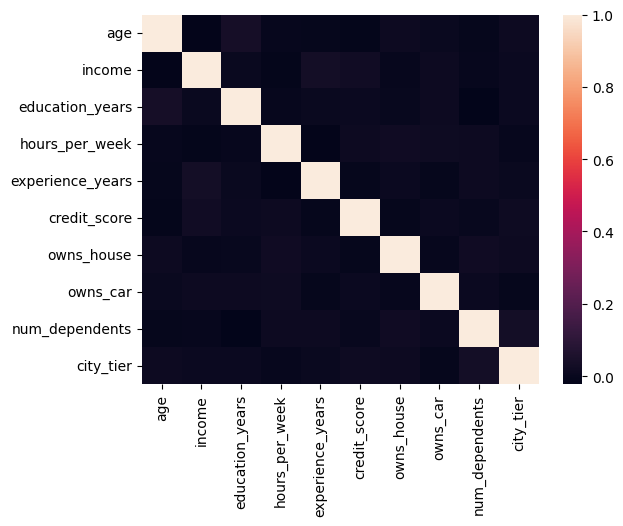

In [17]:
import seaborn as sns
sns.heatmap(X.corr())

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [19]:
X_test.shape

(1000, 10)

In [20]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,precision_score
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred))

Accuracy Score :  0.767
Precision Score :  0.7298850574712644


In [23]:
model.feature_importances_

array([0.        , 0.94172676, 0.        , 0.        , 0.01196027,
       0.00427483, 0.04092954, 0.        , 0.00110861, 0.        ])

## using cross validation

In [24]:
model = DecisionTreeClassifier(max_depth=5)
score = cross_val_score(model,X,y,cv=5,scoring='accuracy')
print("Accuracy Score : ",score.mean())

score = cross_val_score(model,X,y,cv=5,scoring='precision')
print("Precision Score : ",score.mean())

Accuracy Score :  0.7888
Precision Score :  0.7467992684304465


## scaling data

In [25]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [26]:
# model = DecisionTreeClassifier(max_depth = 5)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print("Accuracy Score : ",accuracy_score(y_test,y_pred)) -> 0.772

# no changes

In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[504, 103],
       [119, 274]])

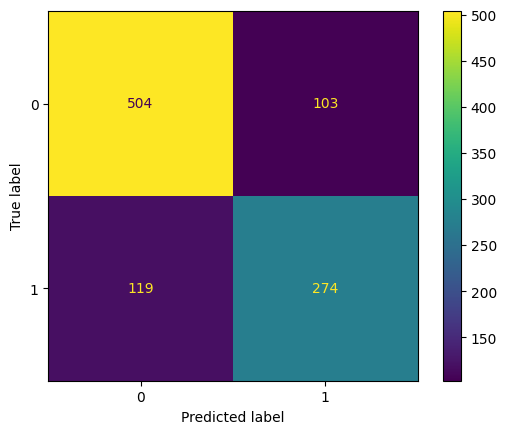

In [72]:
display_labels = ["0", "1"] # Customize your labels

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot()
plt.show()

## Hyperparameter tuning

- RandomizedSearchCV

In [29]:
# randomized searchcv
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [30]:
# max_depth=None, min_samples_split=2,
# min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features=None, random_state=None,
# max_leaf_nodes=None, min_impurity_decrease=0.0,

In [31]:
param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': np.arange(50, 300, 25).tolist(),
    'min_samples_leaf': [10, 20, 50, 100],
    'class_weight': [None, "balanced"]
}

In [32]:
Kfold = KFold(n_splits = 5,shuffle=True,random_state=1)

In [33]:
model = DecisionTreeClassifier()
rscv = RandomizedSearchCV(model,param_grid,scoring='precision',refit=True,cv=Kfold,verbose=2,n_iter=20,n_jobs=-1)

In [34]:
rscv.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [10, 20, 50, 100],
                                        'min_samples_split': [50, 75, 100, 125,
                                                              150, 175, 200,
                                                              225, 250, 275]},
                   scoring='precision', verbose=2)

In [35]:
rscv.best_score_

np.float64(0.7527664700835063)

In [36]:
rscv.best_params_

{'min_samples_split': 150,
 'min_samples_leaf': 20,
 'max_depth': 3,
 'class_weight': None}

In [37]:
# Grid Search

model = DecisionTreeClassifier()
gscv = GridSearchCV(model,param_grid,scoring='precision',refit=True,cv=Kfold,verbose=2,n_jobs=-1)

In [38]:
gscv.fit(X,y)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'min_samples_split': [50, 75, 100, 125, 150, 175, 200,
                                               225, 250, 275]},
             scoring='precision', verbose=2)

In [39]:
gscv.best_score_

np.float64(0.76707753279955)

In [40]:
gscv.best_params_

{'class_weight': None,
 'max_depth': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [41]:
# final model

model = DecisionTreeClassifier(max_depth= 4,
 min_samples_leaf = 100,
 min_samples_split= 50)

In [42]:
score = cross_val_score(model,X,y,cv=5,scoring='accuracy')
print("Accuracy Score : ",score.mean())

score = cross_val_score(model,X,y,cv=5,scoring='precision')
print("Precision Score : ",score.mean())

Accuracy Score :  0.8018000000000001
Precision Score :  0.7604991760493373


In [43]:
from sklearn.model_selection import cross_val_score

print("Recall:", cross_val_score(model, X, y, cv=5, scoring='recall').mean())
print("F1:", cross_val_score(model, X, y, cv=5, scoring='f1').mean())
print("ROC-AUC:", cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean())

Recall: 0.7364999999999999
F1: 0.7481711101423608
ROC-AUC: 0.8715879166666667


In [44]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=50)

In [45]:
y_pred = model.predict(X_test)

In [46]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       607
           1       0.73      0.70      0.71       393

    accuracy                           0.78      1000
   macro avg       0.77      0.76      0.77      1000
weighted avg       0.78      0.78      0.78      1000



In [47]:
from sklearn.metrics import roc_curve,auc
y_prob = model.predict_proba(X_test)[:,1] #prob of positive class

fpr , tpr, thresholds = roc_curve(y_test,y_prob)



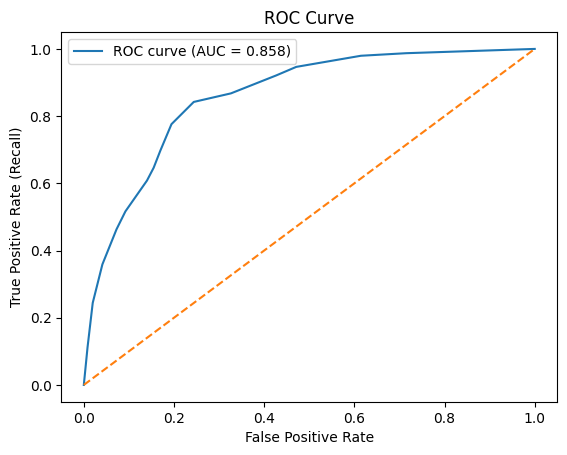

In [48]:
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

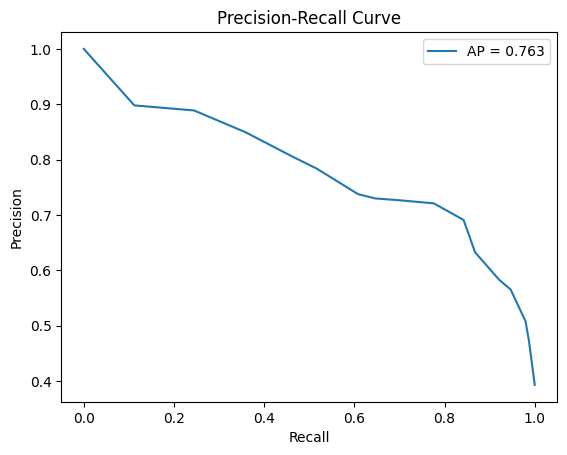

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, label=f"AP = {avg_precision:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [68]:
y_prob = model.predict_proba(X_test)[:,1] #prob of positive class
y_pred_04 = (y_prob >= 0.4).astype(int)
y_pred_03 = (y_prob >= 0.3).astype(int)

In [76]:
y_test.shape

(1000,)

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score

print("=== Threshold 0.4 ===")
print("Precision:", precision_score(y_test, y_pred_04))
print("Recall:", recall_score(y_test, y_pred_04))
print("F1:", f1_score(y_test, y_pred_04))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_04))
print(classification_report(y_test, y_pred_04))

print("\n=== Threshold 0.3 ===")
print("Precision:", precision_score(y_test, y_pred_03))
print("Recall:", recall_score(y_test, y_pred_03))
print("F1:", f1_score(y_test, y_pred_03))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))

=== Threshold 0.4 ===
Precision: 0.6910229645093946
Recall: 0.8422391857506362
F1: 0.7591743119266054
Confusion Matrix:
 [[459 148]
 [ 62 331]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       607
           1       0.69      0.84      0.76       393

    accuracy                           0.79      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.79      0.79      1000


=== Threshold 0.3 ===
Precision: 0.6910229645093946
Recall: 0.8422391857506362
F1: 0.7591743119266054
Confusion Matrix:
 [[459 148]
 [ 62 331]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       607
           1       0.69      0.84      0.76       393

    accuracy                           0.79      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.79      0.79      1000



In [67]:

thresholds = np.linspace(0.1, 0.9, 81)
best_t, best_f1 = 0, 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("Best threshold:", best_t)
print("Best F1:", best_f1)

Best threshold: 0.30000000000000004
Best F1: 0.7591743119266054


# Final Model

In [77]:
final_model = DecisionTreeClassifier(max_depth= 4,
                                      min_samples_leaf = 100,
                                      min_samples_split= 50)

In [78]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=50)

In [84]:
y_prob = final_model.predict_proba(X_test)[:,1]

In [85]:
threshold = 0.3 # chosen to maximize my F1 score
y_pred_final = (y_prob>=threshold).astype(int)

In [95]:
cm = confusion_matrix(y_test,y_pred_final)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[459 148]
 [ 62 331]]


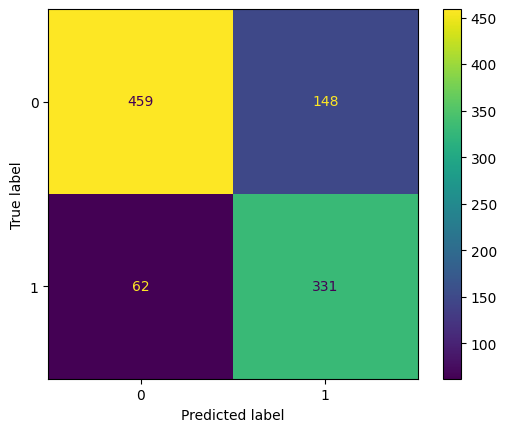

In [96]:
display_labels = ["0", "1"] # Customize your labels

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot()
plt.show()

In [90]:
print("Classification Report\n",classification_report(y_test,y_pred_final))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       607
           1       0.69      0.84      0.76       393

    accuracy                           0.79      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.79      0.79      1000



In [93]:
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.8577536878906398


In [94]:
cv_f1 = cross_val_score(final_model, X_train, y_train, cv=5, scoring="f1")
print("CV F1 mean:", cv_f1.mean())
print("CV F1 std:", cv_f1.std())

CV F1 mean: 0.7413215601792802
CV F1 std: 0.016800763525630837
